In [36]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [37]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [38]:
from matplotlib import pyplot as plt
%matplotlib inline

<Figure size 640x480 with 0 Axes>

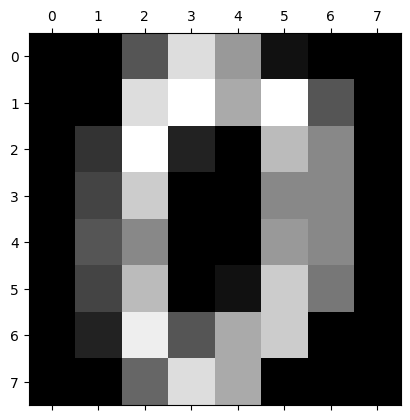

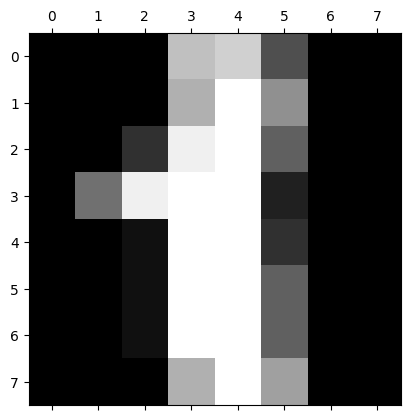

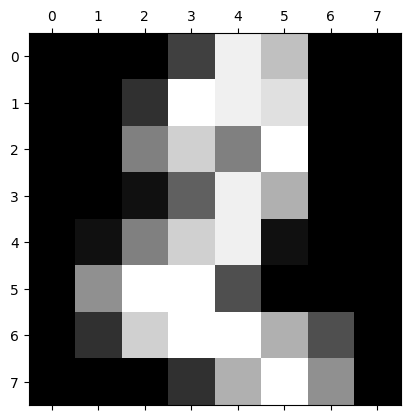

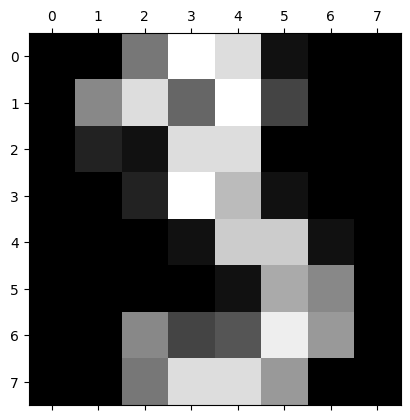

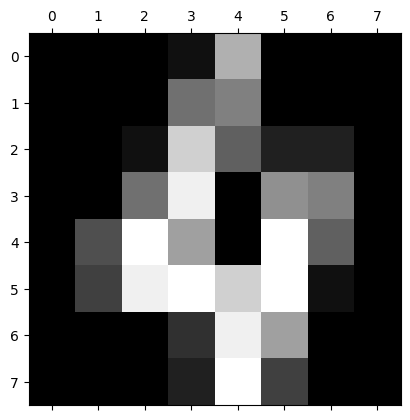

In [39]:
plt.gray()
for i in range(5):
  plt.matshow(digits.images[i])

In [40]:
X = digits.data
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [41]:
y = digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)
len(X_train)

1347

In [43]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [44]:
model.score(X_test,y_test)

0.9533333333333334

Till Now above we have made the model without making the a clear dataframe of the columns of digits data.
    Now below we create a separate dataframe and then make the model.

In [45]:
X1 = digits.data
X1

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [46]:
y1=digits.target
y1

array([0, 1, 2, ..., 8, 9, 8])

In [47]:
df = pd.DataFrame(digits.data)
df.head()
#8*8 pixel data, so it created 64 column dataframe.

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [48]:
df['target'] = y1 #Here we created a new column of target in the dataframe.
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


Splitting the dataset.

In [49]:
X2 = df.drop(['target'],axis='columns')
y2 = df.target
from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2)
len(X2_train),len(X2_test)

(1347, 450)

In [57]:
#Now we import the model and use it in the dataset.
from sklearn.ensemble import RandomForestClassifier
new_model = RandomForestClassifier(n_estimators=30)
new_model.fit(X2_train,y2_train)

RandomForestClassifier(n_estimators=30)

In [58]:
new_model.score(X2_test,y2_test)

0.9688888888888889

Confusion Matrix

In [62]:
y2_predicted = new_model.predict(X2_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_test,y2_predicted)
cm

array([[51,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 53,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 46,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 53,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  1],
       [ 0,  0,  1,  0,  0,  0,  0,  0, 42,  1],
       [ 0,  0,  0,  2,  0,  1,  0,  1,  1, 35]], dtype=int64)

Text(33.22222222222222, 0.5, 'Predicted')

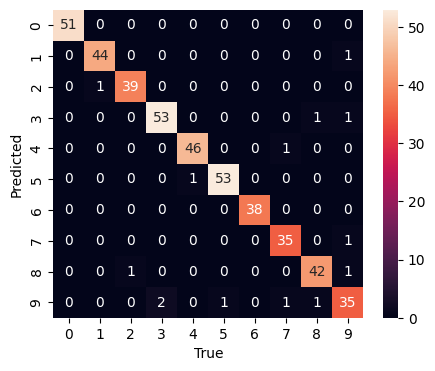

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,4))
sn.heatmap(cm,annot=True)
plt.xlabel('True')
plt.ylabel('Predicted')